In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.__version__ , np.__version__

('0.25.3', '1.17.4')

---

此資料夾是有關"Home cridit"這間公司提供的銷售點(point of sales)與現金貸款服務資料

每一行代表的都是該筆金額分期的當月訊息，一列為一個月

包含 相對於申請日期的餘額月份、合約分幾期、還剩幾期、分期合約狀態、逾期天數

---

In [4]:
data = pd.read_csv('..\\..\\Desktop\\home-credit-default-risk\\POS_CASH_balance.csv')

In [5]:
data

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [40]:
data.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

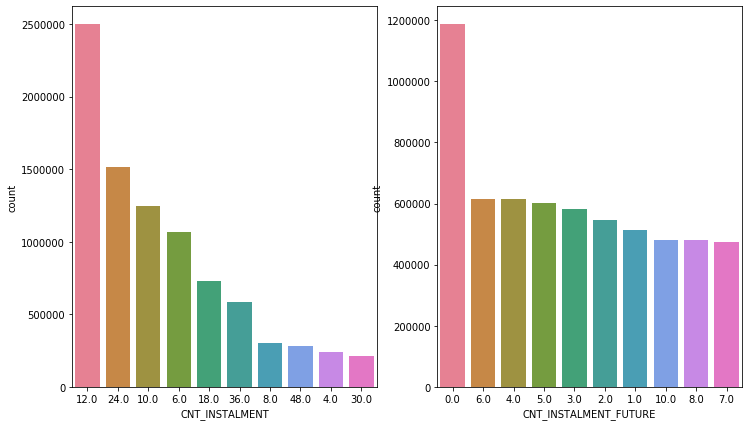

In [86]:
# 申請幾期的分期
fig = plt.figure(figsize=(12,7))
plt.subplot(121)
sns.countplot(data["CNT_INSTALMENT"],
              order=data["CNT_INSTALMENT"].value_counts().index[:10],palette="husl")
# 還有幾期的分期
plt.subplot(122)
sns.countplot(data["CNT_INSTALMENT_FUTURE"],
              order=data["CNT_INSTALMENT_FUTURE"].value_counts().index[:10],palette="husl")

In [74]:
data[data["SK_ID_PREV"]==1283126].sort_values(by=["MONTHS_BALANCE"],ascending=False)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
9999663,1283126,315695,-17,10.0,0.0,Completed,0,0
10000071,1283126,315695,-18,10.0,0.0,Active,698,0
10000085,1283126,315695,-19,10.0,0.0,Active,668,0
10001320,1283126,315695,-20,10.0,0.0,Active,637,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
9999289,1283126,315695,-22,10.0,0.0,Active,578,0
9999922,1283126,315695,-23,10.0,0.0,Active,547,0
10000713,1283126,315695,-24,10.0,0.0,Active,517,0
10000760,1283126,315695,-25,10.0,0.0,Active,486,0
8025175,1283126,315695,-26,10.0,0.0,Active,456,0


In [24]:
# 去掉重複
DPD = data[data["SK_DPD"]>0]
DPD_count=DPD["SK_ID_PREV"].unique().shape[0]
print(f'共有 {DPD_count} 個過期POS貸款')

共有 77032 個過期POS貸款


In [20]:
DPD["SK_DPD"].describe()

count    295227.000000
mean        393.206058
std         668.302135
min           1.000000
25%           5.000000
50%          19.000000
75%         528.000000
max        4231.000000
Name: SK_DPD, dtype: float64

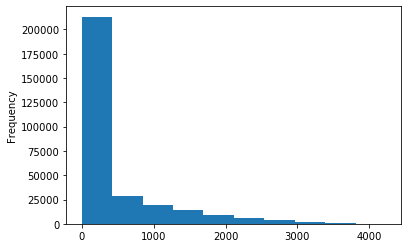

In [19]:
DPD["SK_DPD"].plot.hist()

In [18]:
pd.set_option("display.max_rows",None)
data[data["SK_ID_CURR"]==334279].sort_values(by=["SK_ID_PREV","MONTHS_BALANCE"],ascending=False)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
8016179,2578168,334279,-8,12.0,0.0,Completed,0,0
9369636,2578168,334279,-9,12.0,1.0,Active,0,0
8758829,2578168,334279,-10,12.0,2.0,Active,0,0
7596710,2578168,334279,-11,12.0,3.0,Active,0,0
2694795,2578168,334279,-12,12.0,4.0,Active,0,0
5876072,2578168,334279,-13,12.0,5.0,Active,0,0
7855507,2578168,334279,-14,12.0,6.0,Active,0,0
149864,2578168,334279,-15,12.0,7.0,Active,0,0
5143749,2578168,334279,-16,12.0,8.0,Active,0,0
2330867,2578168,334279,-17,12.0,9.0,Active,0,0


In [44]:
pd.set_option("display.max_rows",None)
data[data["SK_ID_CURR"]==315695].sort_values(by=["MONTHS_BALANCE"],ascending=False)
PREV_number = data[data["SK_ID_CURR"]==315695]["SK_ID_PREV"].unique()
for number in PREV_number:
    print(data[data["SK_ID_PREV"]==number].sort_values(by=["MONTHS_BALANCE"],ascending=False))
    print(" ")

         SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
8380182     1719310      315695             -51            10.0   
8378565     1719310      315695             -52            10.0   
8381703     1719310      315695             -53            10.0   
8460835     1719310      315695             -54            10.0   
8377590     1719310      315695             -55            10.0   
8380432     1719310      315695             -56            10.0   
8460253     1719310      315695             -57            10.0   
7563797     1719310      315695             -58            10.0   
9736843     1719310      315695             -59            10.0   
9251776     1719310      315695             -60            10.0   
9434530     1719310      315695             -61            10.0   
9941339     1719310      315695             -62            10.0   
9310826     1719310      315695             -63            10.0   
9435532     1719310      315695             -64            10.